In [1]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
* {font-family:D2Coding;}
div.container{width:87% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input { font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:3px;}
table.dataframe{font-size:12px;}
</style>
"""))

<font size=5 color=red>04_tensorflow_v1_feat.스케일조절</font>

# 1. tensorflow v2.xx 에서 v1사용하기

In [10]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()  # v2를 비활성화하고 v1활성화
import numpy as np
import pandas as pd

## 1.1. Tensorflow

- 데이터 흐름를 그래프(Tensor 객체의 흐름)
- 이 그래프는 node(상수, 변수 , 연산)의 edge로 구성
- sess = tf.Session()으로 실행
- sess.run()을 통해 값을 확인

In [11]:
# tensor = data(상수, 변수)와 연산
node1 = tf.constant('Hello, Tensorflow')
sess = tf.Session()
print(sess.run(node1))

b'Hello, Tensorflow'


In [12]:
# 간단한 연산 tensor 그래프
node1 = tf.constant(10, dtype=tf.float16)
node2 = tf.constant(20, dtype=tf.float16)

node3 = tf.add(node1, node2)

sess = tf.Session()

print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


In [13]:
# 타입 변경
node1 = tf.constant(np.array([1, 2, 3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
sess.run([node1, node2])

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]

In [14]:
# 평균값 계산 : tf.reduce_mean()
data = np.array([1., 2., 3.])
tensor = tf.reduce_mean(data)
sess = tf.Session()
sess.run(tensor)

2.0

In [16]:
# 랜덤값을 갖는 tensor
a = tf.random_normal([2])  # 평균이 0, 표준편차가 1인 난수 실수 2개 (정규분포를 이루는 난수)
b = tf.random_normal([1])

sess = tf.Session()
sess.run([a, b])

[array([-1.0298789 ,  0.12366588], dtype=float32),
 array([0.3535142], dtype=float32)]

In [25]:
w = tf.Variable(tf.random.normal([1]))
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # w변수의 난수 초기화
sess.run(w)

array([1.4015666], dtype=float32)

# 2. tensorflow v1을 이용한 linear regression 을 구현

## 2.1. 입력(독립)변수 x가 1개, 타켓(종속)변수 y가 1개

In [28]:
x = np.array([1, 2, 3])
y = np.array([2, 3, 4])

# weigh의 bias(처음엔 랜덤값으로 셋팅, 학습과정에서 변경)
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis(예측값)
H = W * x + b

# cost function(손실함수 = mse ; 최소제곱법)
cost = tf.reduce_mean(tf.square(H - y))
'''
학습목적 = cost가 최소화 되는 W, b를 찾아내는 것
cost 는 2차 함수이므로 곡선그래프, 곡선위 미분값이 줄어드는 방향으로 학습(경사하강)
→ Gradient Descent Optimizer
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)  # 미분
train = optimizer.minimize(cost)
# Session 생성
sess = tf.Session()

# W, b 변수 노드에 초기화
sess.run(tf.global_variables_initializer())

# 5000번 학습 (v2에서는 fit함수)
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    
    if step%200 == 0:
        print("{}번쨰 cost : {}, W : {}, b : {}".format(step, cost_val, W_val, b_val))
            

0번쨰 cost : 2.2897613048553467, W : [0.35435513], b : [1.0525901]
200번쨰 cost : 0.004378287587314844, W : [0.92333394], b : [1.1742799]
400번쨰 cost : 0.0016718626720830798, W : [0.95262486], b : [1.1076949]
600번쨰 cost : 0.0006383901927620173, W : [0.9707252], b : [1.0665486]
800번쨰 cost : 0.00024376895453315228, W : [0.98191], b : [1.0411232]
1000번쨰 cost : 9.308511653216556e-05, W : [0.98882127], b : [1.0254117]
1200번쨰 cost : 3.554214708856307e-05, W : [0.9930925], b : [1.0157025]
1400번쨰 cost : 1.357246219413355e-05, W : [0.9957314], b : [1.0097034]
1600번쨰 cost : 5.1831561904691625e-06, W : [0.9973622], b : [1.0059963]
1800번쨰 cost : 1.9791875729424646e-06, W : [0.99836993], b : [1.0037055]
2000번쨰 cost : 7.558618904113246e-07, W : [0.9989926], b : [1.00229]
2200번쨰 cost : 2.88811406790046e-07, W : [0.99937725], b : [1.0014153]
2400번쨰 cost : 1.1048596348928186e-07, W : [0.9996149], b : [1.0008755]
2600번쨰 cost : 4.2422112045414906e-08, W : [0.9997614], b : [1.0005425]
2800번쨰 cost : 1.627959989

In [30]:
# 최종적으로 나온 희귀식 : H = W * x + b
sess.run([W, b])

[array([0.9999891], dtype=float32), array([1.0000248], dtype=float32)]

In [35]:
W_, b_ = sess.run([W, b])
W_[0], b_[0]

(0.9999891, 1.0000248)

In [38]:
def predict(x):
    return W_[0] * x + b_[0]

In [42]:
input_x = int(input('입력값은 ?'))
print('예측값은', predict(input_x))

입력값은 ?3
예측값은 3.999992072582245


## 2.2. predict를 위한 placeholder 이용

- placeholder : 텐서플로우 외부에서 데이터를 입력받는 노드


In [48]:
# x = np.array([1, 2, 3])
x = tf.placeholder(tf.float16)
H = 1 * x + 1
sess = tf.Session()
sess.run(H, feed_dict={x: 5})
sess.run(H, feed_dict={x: np.array([1, 2, 3])})

array([2., 3., 4.], dtype=float16)

In [51]:
# H = 2x + 3
x_data = np.array([1, 2, 3, 5, 8])
y_data = np.array([3, 5, 7, 11, 17])

# placeholder 설정 (입렵변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# W, b
W = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

# Hypothesis (예측값)

H = W * x + b

# 손실함수
cost = tf.reduce_mean(tf.square(H-y))

# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화

# 5000번 학습
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:x_data, y:y_data})
    
    if step%200 == 0:
        print("{}번쨰 cost : {}, W : {}, b : {}".format(step, cost_val, W_val, b_val))

0번쨰 cost : 223.6167449951172, W : [0.396142], b : [-0.5246403]
200번쨰 cost : 0.04167274385690689, W : [2.0694227], b : [0.62893605]
400번쨰 cost : 0.00409886846318841, W : [2.0217726], b : [0.8836266]
600번쨰 cost : 0.0004031683783978224, W : [2.0068283], b : [0.96350265]
800번쨰 cost : 3.96532668673899e-05, W : [2.0021415], b : [0.9885538]
1000번쨰 cost : 3.90126933780266e-06, W : [2.0006716], b : [0.99640995]
1200번쨰 cost : 3.8388907341868617e-07, W : [2.0002108], b : [0.9988737]
1400번쨰 cost : 3.786517410730994e-08, W : [2.000066], b : [0.99964654]
1600번쨰 cost : 3.739216936082812e-09, W : [2.0000207], b : [0.99988925]
1800번쨰 cost : 3.793161340581719e-10, W : [2.0000067], b : [0.9999645]
2000번쨰 cost : 5.184119800105691e-11, W : [2.0000026], b : [0.99998695]
2200번쨰 cost : 2.060005464821213e-11, W : [2.0000017], b : [0.99999213]
2400번쨰 cost : 2.060005464821213e-11, W : [2.0000017], b : [0.99999213]
2600번쨰 cost : 2.060005464821213e-11, W : [2.0000017], b : [0.99999213]
2800번쨰 cost : 2.060005464821

In [53]:
# 예측하기
sess.run(H, feed_dict={x:5})

array([11.000001], dtype=float32)

In [54]:
sess.run(H, feed_dict={x: np.array([5, 6, 7])})

array([11.000001, 13.000002, 15.000004], dtype=float32)

## 2.3. scale 이 다른 데이터의 linear regression 구현 (scale 조정 X)

In [101]:
# H = 2x + 3
x_data = np.array([1, 2, 5, 8, 10])
y_data = np.array([3, 15, 68, 80, 95])

# placeholder 설정 (입렵변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# W, b
W = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

# Hypothesis (예측값)

H = W * x + b

# 손실함수
cost = tf.reduce_mean(tf.square(H-y))

# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화

# 5000번 학습
for step in range(1000):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:x_data, y:y_data})
    
    if step%200 == 0:
        print("{}번쨰 cost : {}, W : {}, b : {}".format(step, cost_val, W_val, b_val))

0번쨰 cost : 3985.20654296875, W : [7.7205787], b : [2.1635752]
200번쨰 cost : 83.89234924316406, W : [10.146583], b : [-0.21805583]
400번쨰 cost : 83.51993560791016, W : [10.255428], b : [-1.0239772]
600번쨰 cost : 83.48575592041016, W : [10.288396], b : [-1.2680846]
800번쨰 cost : 83.4826431274414, W : [10.298382], b : [-1.3420228]


In [ ]:
# cost값이 멈춤 : local 최소값

## 2.4. scale 이 다른 데이터의 linear regression을 구현 (scale 조정 ㅇ)

### 1) scale 을 맞추기 : 모든 데이터를 일정 범위내로 조정

- normalization (정규화) : 0 ~ 1로 조정

                            X - Xmin
    - normalization = --------------------------
                            Xmax - Xmin
    - 위의 식을 써도 되지만, 라이브러리를 씀(sklearn.preprocessing.MinMaxScaler이용)                    
                        
- standardization (표준화) : 평균0, 표준편차 1로 조정

                            X - Xmean(평균)
    - standardization = --------------------------
                            Xstd(표준편차)
    - 위의 식을 써도 되지만, 라이브러리를 씀(sklearn.preprocessing.StandardScaler이용)                    

In [107]:
# 라이브러리를 쓰지 않고, 정규화
x_data = np.array([1, 2, 5, 8, 10])
y_data = np.array([3, 15, 68, 80, 95])

scaled_x_data = (x_data - x_data.min()) / (x_data.max() - x_data.min())
scaled_y_data = (y_data - y_data.min()) / (y_data.max() - y_data.min())

print(scaled_x_data)
print(scaled_y_data)

[0.         0.11111111 0.44444444 0.77777778 1.        ]
[0.         0.13043478 0.70652174 0.83695652 1.        ]


In [108]:
# 라이브러리를 쓰고 정규화 (MinmaxScaler 이용)
x_data = np.array([1, 2, 5, 8, 10]).reshape(-1, 1)
y_data = np.array([3, 15, 68, 80, 95]).reshape(-1, 1)
# np.column_stack([x_data, y_data])
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()  # x_data를 정규화시킬 객체

# scaler_x.fit(x_data)
# scaled_x_data = scaler_x.transform(x_data)
scaled_x_data = scaler_x.fit_transform(x_data)

scaler_y = MinMaxScaler()  # y_data를 정규화시킬 객체
scaled_y_data = scaler_y.fit_transform(y_data)

np.column_stack([x_data, y_data, scaled_x_data, scaled_y_data])

# placeholder 설정 (입렵변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# W, b
W = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

# Hypothesis (예측값)

H = W * x + b

# 손실함수
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # W, b 초기화

# 15000 학습
for step in range(15001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],
                                         feed_dict={
                                             x: scaled_x_data,
                                             y: scaled_y_data
                                         })

    if step % 500 == 0:
        print("{}번쨰 cost : {}, W : {}, b : {}".format(step, cost_val, W_val,
                                                      b_val))

0번쨰 cost : 0.28556233644485474, W : [-0.2977222], b : [0.5069252]
500번쨰 cost : 0.18581125140190125, W : [-0.09262364], b : [0.57477194]
1000번쨰 cost : 0.14574575424194336, W : [0.04605191], b : [0.55210006]
1500번쨰 cost : 0.11721716821193695, W : [0.1568849], b : [0.50807774]
2000번쨰 cost : 0.09488210827112198, W : [0.25191557], b : [0.46205106]
2500번쨰 cost : 0.07721078395843506, W : [0.33545876], b : [0.4191211]
3000번쨰 cost : 0.06321386247873306, W : [0.4095176], b : [0.38034752]
3500번쨰 cost : 0.05212609842419624, W : [0.475347], b : [0.3456757]
4000번쨰 cost : 0.04334265738725662, W : [0.5339137], b : [0.31476995]
4500번쨰 cost : 0.03638466075062752, W : [0.5860333], b : [0.28724912]
5000번쨰 cost : 0.03087274357676506, W : [0.6324198], b : [0.2627507]
5500번쨰 cost : 0.026506343856453896, W : [0.6737053], b : [0.24094495]
6000번쨰 cost : 0.023047424852848053, W : [0.71045065], b : [0.2215367]
6500번쨰 cost : 0.020307384431362152, W : [0.7431552], b : [0.20426254]
7000번쨰 cost : 0.018136797472834587

In [109]:
# 예측 : 모델에 scale 조정된 값으로 예측=>scale 조정된 y값
# scaled_input
scaled_input = scaler_x.transform(np.array([[2], [3]]))
scaled_input
print('모델 예측 위한 입력 :', scaled_input, sep='\n')
# scaled_output
scaled_output = sess.run(H, feed_dict={x: scaled_input})
print('모델 예측 결과 :', scaled_output, sep='\n')

print('결과 :', scaler_y.inverse_transform(scaled_output), sep='\n')

모델 예측 위한 입력 :
[[0.11111111]
 [0.22222222]]
모델 예측 결과 :
[[0.19166636]
 [0.29959264]]
결과 :
[[20.633307]
 [30.562523]]


In [110]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x: scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)

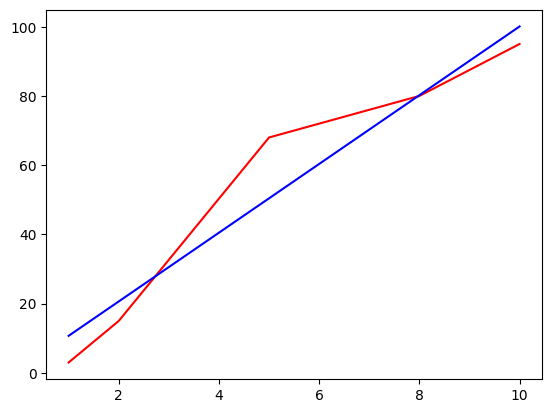

In [111]:
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')

In [120]:
# 라이브러리를 쓰고 표준화 (StandardScaler 이용)
x_data = np.array([1, 2, 5, 8, 10]).reshape(-1, 1)
y_data = np.array([3, 15, 68, 80, 95]).reshape(-1, 1)

from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler() # x_data를 표준화할 객체
scaler_y = StandardScaler() # y_data를 표준화할 객체

scaled_x_data = scaler_x.fit_transform(x_data)
scaled_y_data = scaler_y.fit_transform(y_data)

# print(np.column_stack([x_data, y_data]))
# print(np.column_stack([scaled_x_data, scaled_y_data]))

# placeholder 설정 (입렵변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# W, b
W = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

# Hypothesis (예측값)

H = W * x + b

# 손실함수
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # W, b 초기화

# 15000 학습
for step in range(15001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],
                                         feed_dict={
                                             x: scaled_x_data,
                                             y: scaled_y_data
                                         })

    if step % 500 == 0:
        print("{}번쨰 cost : {}, W : {}, b : {}".format(step, cost_val, W_val,
                                                      b_val))

0번쨰 cost : 9.610828399658203, W : [-2.0292697], b : [0.724889]
500번쨰 cost : 1.3523017168045044, W : [-0.13343576], b : [0.2664049]
1000번쨰 cost : 0.23686687648296356, W : [0.563305], b : [0.09790672]
1500번쨰 cost : 0.08621138334274292, W : [0.8193649], b : [0.03598184]
2000번쨰 cost : 0.06586316227912903, W : [0.9134699], b : [0.01322374]
2500번쨰 cost : 0.06311487406492233, W : [0.9480539], b : [0.00485988]
3000번쨰 cost : 0.06274367868900299, W : [0.9607642], b : [0.00178607]
3500번쨰 cost : 0.0626935213804245, W : [0.9654354], b : [0.00065641]
4000번쨰 cost : 0.06268675625324249, W : [0.9671523], b : [0.00024125]
4500번쨰 cost : 0.06268583238124847, W : [0.96778315], b : [8.8667846e-05]
5000번쨰 cost : 0.06268572062253952, W : [0.9680154], b : [3.259456e-05]
5500번쨰 cost : 0.06268570572137833, W : [0.96810013], b : [1.1986471e-05]
6000번쨰 cost : 0.06268569827079773, W : [0.9681325], b : [4.413136e-06]
6500번쨰 cost : 0.06268569827079773, W : [0.96813506], b : [1.6381791e-06]
7000번쨰 cost : 0.06268569082

In [121]:
# 예측 : 모델에 scale 조정된 값으로 예측=>scale 조정된 y값
# scaled_input
scaled_input = scaler_x.transform(np.array([[2], [3]]))
scaled_input
print('모델 예측 위한 입력 :', scaled_input, sep='\n')
# scaled_output
scaled_output = sess.run(H, feed_dict={x: scaled_input})
print('모델 예측 결과 :', scaled_output, sep='\n')

print('결과 :', scaler_y.inverse_transform(scaled_output), sep='\n')

모델 예측 위한 입력 :
[[-0.93313895]
 [-0.64153303]]
모델 예측 결과 :
[[-0.9034045 ]
 [-0.62109053]]
결과 :
[[19.2318  ]
 [29.534367]]


In [122]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x: scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)

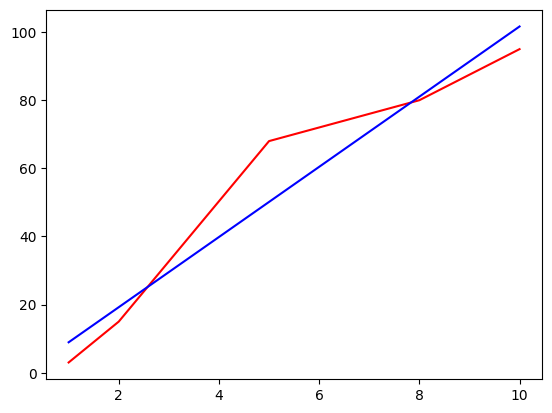

In [123]:
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')